# A/B-тест в крупном интернет-магазине

**Описание проекта**

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Описание данных**

В моём распоряжении три датасета. Файл `hypothesis.csv` хранит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами, `orders.csv` и `visitors.csv` — результаты A/B-теста.

Структура `hypothesis.csv`:

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Структура `orders.csv`:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Структура `visitors.csv`:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

## Приоритизация гипотез.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import datetime as dt

In [2]:
# Открытие данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Применение фреймворка `ICE`

In [3]:
# Расчет ICE для гипотез и сортировка результата по убыванию
pd.options.display.max_colwidth = 130
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применение фреймворка `RICE`

In [4]:
# Расчет RICE для гипотез и сортировка результата по убыванию
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Сравнение результатов приоритизации.

In [5]:
# Сортировка гипотез по параметру Reach
hypothesis.sort_values(by='Reach', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2



По результату фреймворка `ICE`, в топ-3 вошли гипотезы:
* 8	Запустить акцию, дающую скидку на товар в день рождения;
* 0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

По результату фреймворка `RICE`, лидерами стали гипотезы:

* 7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* 2	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
* Третье место разделили 2 гипотезы:
    * 0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    * 6	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.


Разница в приоритизации связана с тем, что параметр `Reach` гипотезы 7 максимальный и равен 10, поэтому она занимает первое место. 

## Анализ А/B-теста

### Предобработка данных

In [6]:
# Вывод первых строк каждого набора данных методом head()
display(visitors.head())
orders.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# сохранение списка датафреймов во временную переменную для выполнения циклов
temp = [orders, visitors]

In [8]:
# Вывод информации обо всех табицах в цикле
for df in temp:
    print(df.info())
    print('\033[1m' + 'Количество пропущенных значений в таблице по столбцам:' + '\033[0m')
    print(df.isna().sum())
    print('\033[1m' + 'Количество явных дубликатов в таблице:' + '\033[0m')
    print(df.duplicated().sum())
    print('-'* 55)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Количество пропущенных значений в таблице по столбцам:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество явных дубликатов в таблице:
0
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-n

In [9]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

print(orders.dtypes)
visitors.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object


date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [10]:
print(
    visitors.groupby('group', as_index=False)
    .agg({'visitors': 'sum'})
)

  group  visitors
0     A     18736
1     B     18916


По количеству посетителей вгруппах у нас практически паритет.

In [11]:
print(
    orders.groupby('group', as_index=False)
    .agg({'transactionId': 'count'})
)

  group  transactionId
0     A            557
1     B            640


Количество заказов в группе В выше. Это не может не радовать.

In [12]:
print('Дата начала теста:', visitors['date'].min())
print('Дата окончания теста:', visitors['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


Для проведения теста был выбран последний месяц лета - август.

На этапе предобработки данных все столбцы с датой и временем были преобразованы в соответсвующие форматы. Поиски пропусков не увенчались успехом - в рассматриваемых датафреймах они отсутствуют. Проверка показала отсутствие явных дубликатов в исследуемых датафреймах.

### Построение графика кумулятивной выручки по группам

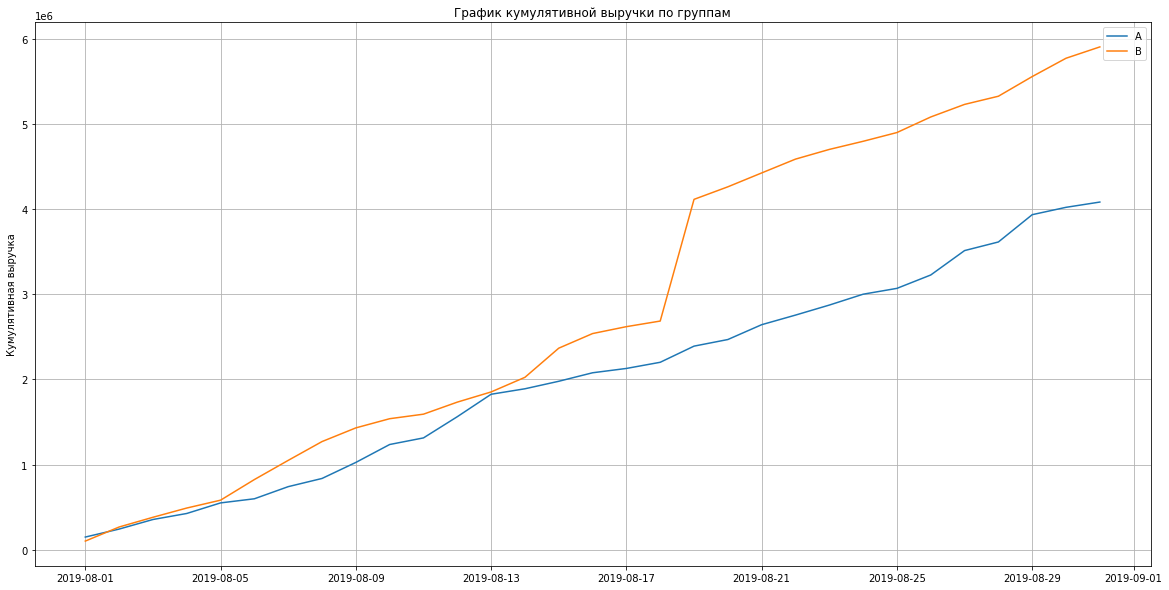

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20, 10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Кумулятивная выручка')

plt.legend()
plt.grid()
plt.show()


Выручка увеличивается равномерно в течении всего теста у группы А. Однако график группы В резко растёт в точке 2019-08-18. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построение графика кумулятивного среднего чека по группам.

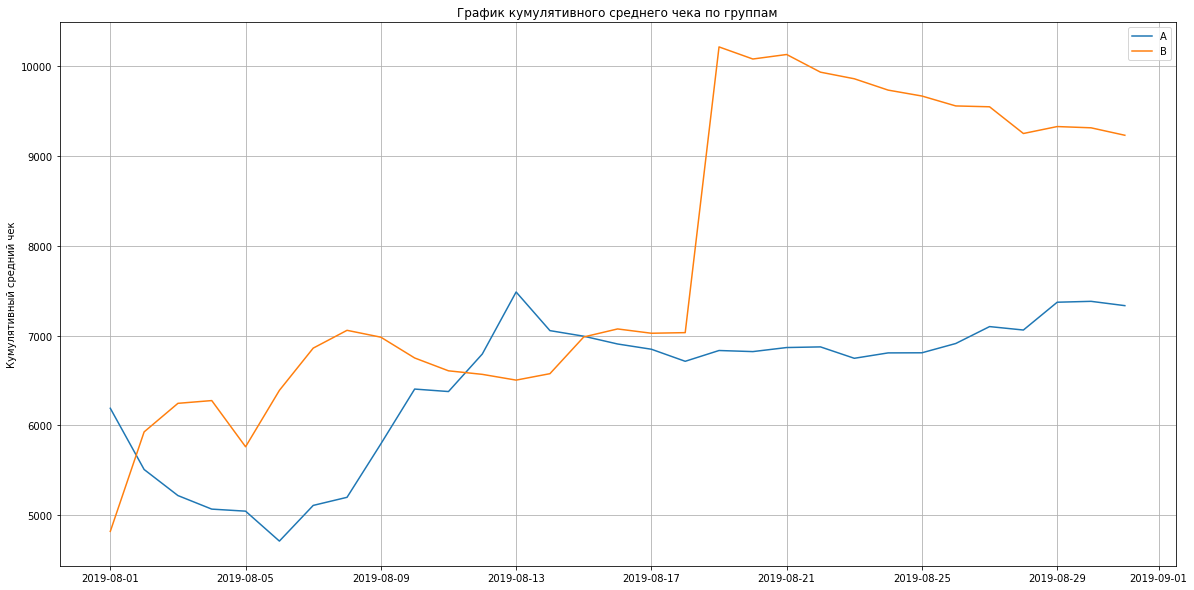

In [14]:
plt.figure(figsize=(20, 10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.grid()
plt.show()

Кажется, что график группы А к концу теста установился на уровне реального среднего чека. Однако в группу В во второй половине теста попали крупные заказы, из-за чего возник резкий всплеск, для неё необходимо больше данных, чтобы прийти к реальному среднему.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

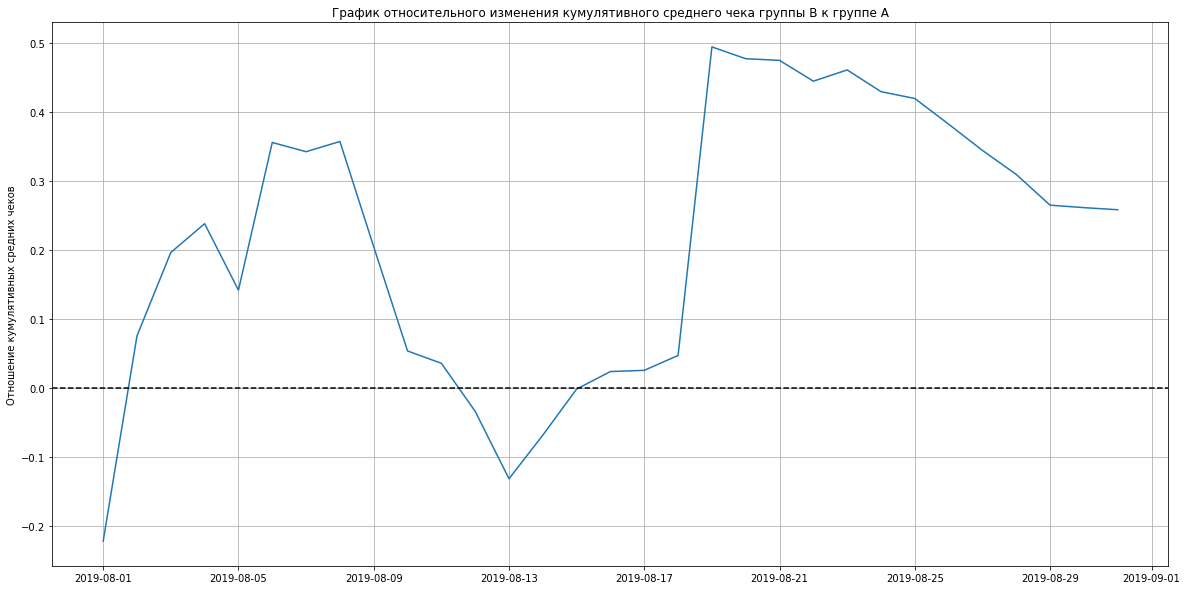

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(20, 10))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение кумулятивных средних чеков')
plt.grid()
plt.show()

В нескольких точках график различия для среднего чека резко увеличивается и уменьшается. Это свидетельствует о крупных заказах и выбросах.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

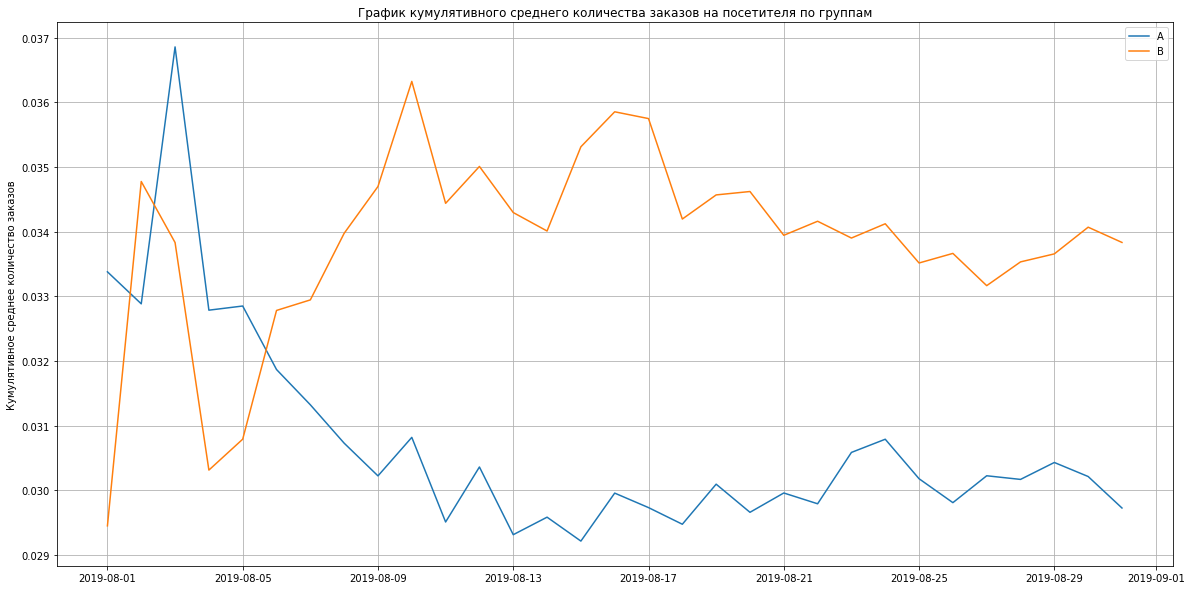

In [16]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(20, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.legend()
plt.grid()
plt.show()

"Движения" графиков сильно отличаются.

Группа А уменьшается и стабилизиуется на своём среднем значении.

Группа В имеет большой всплеск до середины и в целом большее значение метрики относительно группы А, но в ходе теста значение среднего количества заказов на посетителя зафиксировалось.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

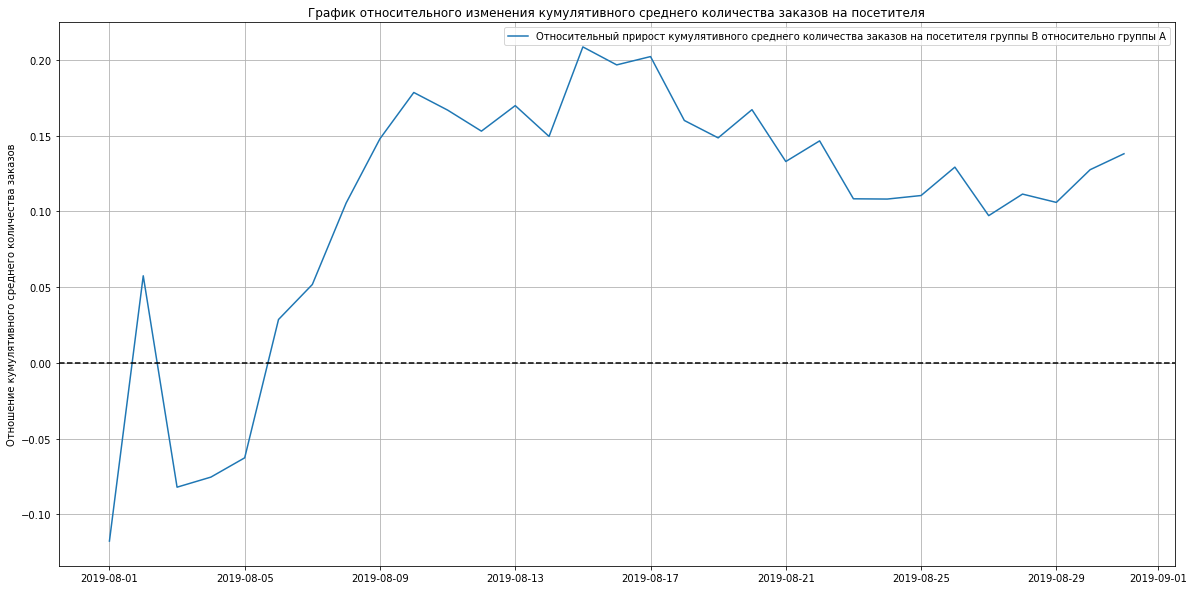

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', 
    how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(20, 10))

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A"
)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Отношение кумулятивного среднего количества заказов')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

По началу группа В проигрывала группе А, затем, после большого всплеска, вырвалась вперёд.

В целом видно, что отношение среднего количества заказов на посетителя ещё не установилось. Необходимо проанализировать аномалии для дальнейшего анализа.

### Построение точечного графика количества заказов по пользователям.

In [18]:
orders_agg = (
    orders
    .groupby(by=['visitorId'])
    .agg({'transactionId': 'count'})
    .rename(columns={'transactionId': 'orders_cnt'})
    .reset_index()
)

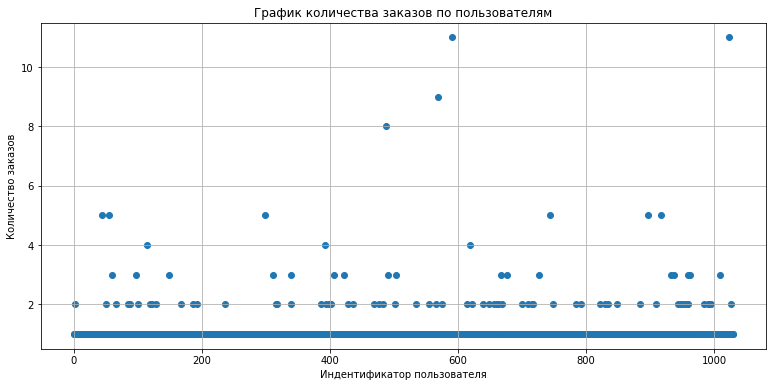

In [19]:
plt.figure(figsize=(13, 6))

x_values = pd.Series(range(0, len(orders_agg['orders_cnt'])))
plt.scatter(x_values, orders_agg['orders_cnt'])

plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Индентификатор пользователя')
plt.grid()
plt.show()

По графику заметно наличие выбросов: некоторые пользователи совершали по 10-12 заказов. Предположительно, реальное значение количества заказов находится в диапазоне от 1 до 3 заказов.

### Расчёт 95-й и 99-й перцентилей количества заказов на пользователя.

In [20]:
# Подсчёт выборочных перцентилей количества заказов на пользователя
print('Перцентили количества заказов:', np.percentile(orders_agg['orders_cnt'], [95, 99])) 

Перцентили количества заказов: [2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. Следовательно, границей для определения аномальных значений можно взять 3 заказа на одного пользователя.

### Построение точечного графика стоимостей заказов.

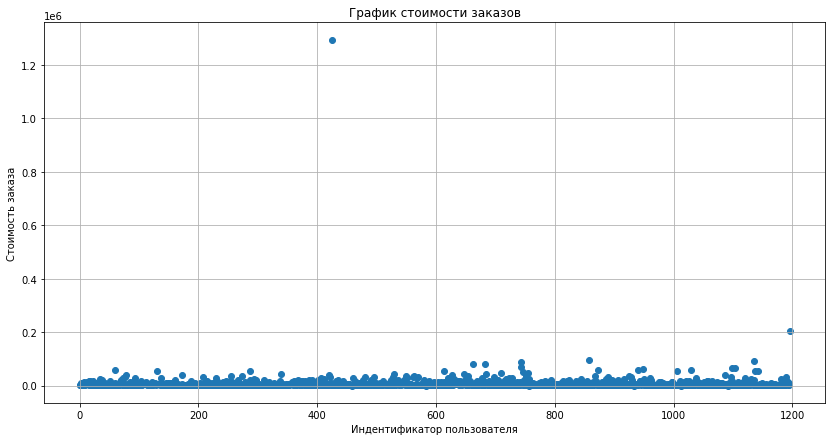

In [21]:
plt.figure(figsize=(14, 7))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('График стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Индентификатор пользователя')
plt.grid()
plt.show()

По графику можно сделать вывод о том, что в данных есть пара аномальных значений. Для того чтобы их убрать, нужно задать границу в 200 000.

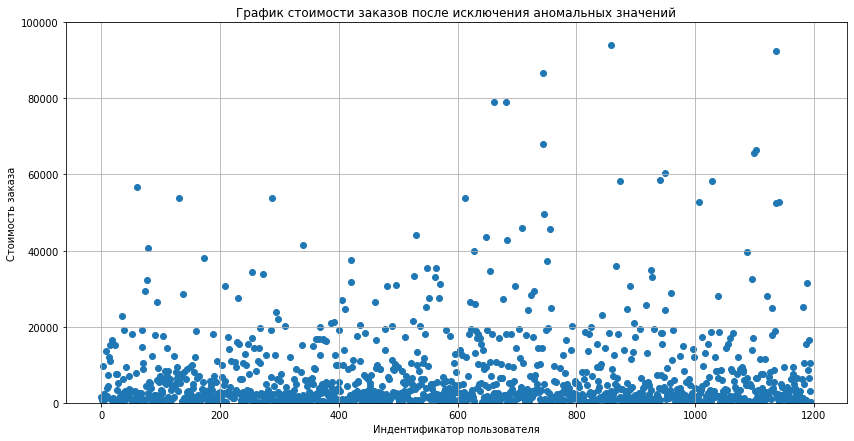

In [22]:
plt.figure(figsize=(14, 7))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('График стоимости заказов после исключения аномальных значений')
plt.ylabel('Стоимость заказа')
plt.xlabel('Индентификатор пользователя')
plt.ylim(0,100000)
plt.grid()
plt.show()

По "очищенному" графику видно, что большинство заказов имеют стоимость до 20 000 и лишь несколько выходят за границу в 80 000.

### Расчёт 95-й и 99-й перцентилей стоимости заказов

In [23]:
# Подсчёт выборочных перцентилей стоимости заказов
print('Перцентили количества заказов:', np.percentile(orders['revenue'], [95, 99]))

Перцентили количества заказов: [28000.  58233.2]


Не более 5% заказов дороже 28 000 и лишь 1% заказов дороже 58 233.

На основании этих данных, выберу границу в 58 233 для определения аномальных заказов. 

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Формулировка гипотез:**

Н0: различий в среднем количестве заказов между группами нет;

Н1: различия в среднем между группами есть.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = (
    visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print(sampleB)
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница средних:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64
p-value: 0.017
Относительная разница средних: 0.138


Вывод: `p-value` = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем.

Относительный прирост группы В равен 13.8%.

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**Формулировка гипотез:**

Н0: различий в среднем чеке между группами нет;

Н1: различия в среднем чеке между группами есть.

In [26]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[orders['group']=='A']['revenue'],
            orders[orders['group']=='B']['revenue'])[1])
)
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean(
    )/orders[orders['group']=='A']['revenue'].mean()-1)
)

0.729
0.259


Вывод: `p-value` = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет - оставляем. 

Поскольку относительное различие среднего чека между сегментами составляет 25.9%, наблюдаемые различия не являются значимыми при такой уровне значимости, а следовательно были получены случайно.

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Формулировка гипотез:**

Н0: различий в среднем количестве заказов между группами нет;

Н1: различия в среднем количестве заказов между группами есть.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= np.percentile(orders_agg['orders_cnt'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= np.percentile(orders_agg['orders_cnt'], 99)]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64
20


В итоге получилось 20 аномальных пользователей. Узнаем как их присутствие повлияло на результаты теста.

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница средних:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.014
Относительная разница средних: 0.151


Вывод: `p-value` = 0.014 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем.

Относительный прирост группы В равен 15.1%.

Результаты по среднему количеству заказов практически не изменились.

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

**Формулировка гипотез:**

Н0: различий в среднем чеке между группами нет;

Н1: различия в среднем чеке между группами есть.

In [29]:
print(
    'p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительная разница средних:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.959
Относительная разница средних: -0.014


Вывод: статистической разницы между "сырыми" и "очищенными" данными нет. 

`p-value` увеличился с 72.9% до 95.9%. А относительная разница между сегментами уменьшилась с 25.9% до -1.4%.

### Результаты А/В-теста

**Имеющиеся факты:**
    
* Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденция к ухудшению.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных группа А на самом деле лучше группы В — практически нулевая.

**Кумулятивным метрики:**

* Выручка неравномерно растет в течение всего теста;
* Средний чек тоже неравномерный, так как в группу В попали аномальные заказы;
* Графики кумулятивного среднего количества заказов на посетителя по группам имеет резкие "взлёты" и "падения", но ближе к концу теста стабилизируется на уровне реального среднего значения;

**Влияние аномальных значений:**

* Аномалии практически не повлияли на статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» и "сырым" данным . Разница `p_value` между данными с выбросами и без составила 0.1%, а относительный прирост группы В к группе А увеличился с 13.8% до 14.8%

* Статистическая разница между "очищенными" и "сырыми" данными о среднем чеке заказа между группами отсутствует. `p_value` увеличился с 72.9% до 97.7%. Относительный прирост группы В к группе А уменьшился с 25.9% до -1.7%.

На основании полученных результатов исследования, можно утверждать, что различия среднего количества заказов между группами имеют статистическую значимость. Это значит, что средние значения количества заказов по группам имеют существенную разницу.

При этом статистически значимой разницы между средними значениями чеков между группами не было выявлено. 

По результатам проекта можно сделать вывод о том, что выручка увеличилась, так как среднее количество заказов выросло, а средний чек остался без изменений.